1.Imports

2.Get the data

3.Create into tensors and split into train test

4.Built the model

5.Build the training loop

6.Get final predictions

In [42]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import seaborn as sns

<Axes: >

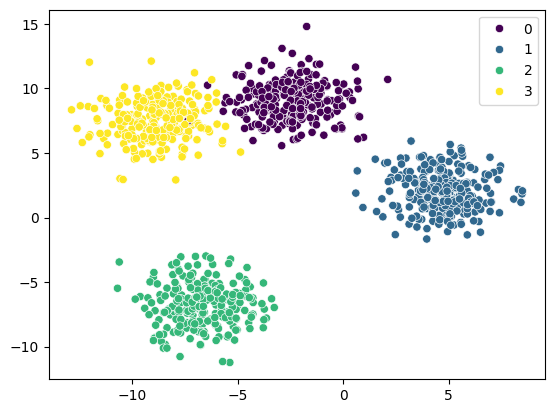

In [43]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# Plot the data
sns.scatterplot(x=X_blob[:, 0], y=X_blob[:, 1], hue=y_blob, palette="viridis")

In [44]:
X_tensor = torch.from_numpy(X_blob).squeeze().float()
y_tensor = torch.from_numpy(y_blob).squeeze().long()

X_train,X_test,y_train,y_test = train_test_split(X_tensor,y_tensor,train_size = 0.8)

In [45]:
from torch import nn

class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units):
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features=input_features,out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units,out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units,out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

model = BlobModel(input_features=NUM_FEATURES,output_features=NUM_CLASSES,hidden_units=8)

In [46]:
def trainingLoop(epochs,model,loss_fn,optimizer,accuracy_function):
  for epoch in range(epochs):
    #1.Set model to train mode
    #2.Forward step(make predictions)  (Convert Logits --> Probabilities(using sigmoid function) --> y label (using round) )
    #3.Calculate loss and accuracy
    #4.Set optimizer to zero grad
    #5.Loss Backprop
    #6.Step Optimizer
    #7.Calculate test loss and accuracy

    model.train()

    y_train_logits = model(X_train)
    y_train_probabilities = torch.softmax(y_train_logits,dim=1)
    y_train_preds = torch.argmax(y_train_probabilities,dim=1)

    loss = loss_fn(y_train_logits,y_train)

    y_train_preds_numpy = y_train_preds.detach().numpy()
    accuracy = accuracy_function(y_train,y_train_preds_numpy)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    #Calculate test loss

    model.eval()
    with torch.inference_mode():
      y_test_logits = model(X_test)
      y_test_probabilities = torch.softmax(y_test_logits,dim=1)
      y_test_preds = torch.argmax(y_test_probabilities,dim=1)

      test_loss = loss_fn(y_test_logits,y_test)

      y_test_preds_numpy = y_test_preds.detach().numpy()
      test_accuracy = accuracy_function(y_test,y_test_preds_numpy)

      if epoch%10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {accuracy:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}%")

      if epoch==epochs-1:
        from sklearn.metrics import classification_report

        print(classification_report(y_true = y_test,y_pred = y_test_preds_numpy))



In [47]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.2)
from sklearn.metrics import accuracy_score

trainingLoop(100,model,loss_function,optimizer,accuracy_score)

Epoch: 0 | Loss: 1.54149, Accuracy: 0.20% | Test loss: 1.19752, Test acc: 0.52%
Epoch: 10 | Loss: 0.21344, Accuracy: 0.99% | Test loss: 0.15479, Test acc: 0.99%
Epoch: 20 | Loss: 0.10674, Accuracy: 0.99% | Test loss: 0.07410, Test acc: 0.99%
Epoch: 30 | Loss: 0.04904, Accuracy: 0.99% | Test loss: 0.03644, Test acc: 0.99%
Epoch: 40 | Loss: 0.03763, Accuracy: 0.99% | Test loss: 0.02870, Test acc: 0.99%
Epoch: 50 | Loss: 0.03273, Accuracy: 0.99% | Test loss: 0.02549, Test acc: 0.99%
Epoch: 60 | Loss: 0.02997, Accuracy: 0.99% | Test loss: 0.02384, Test acc: 0.99%
Epoch: 70 | Loss: 0.02819, Accuracy: 0.99% | Test loss: 0.02287, Test acc: 0.99%
Epoch: 80 | Loss: 0.02694, Accuracy: 0.99% | Test loss: 0.02224, Test acc: 0.99%
Epoch: 90 | Loss: 0.02602, Accuracy: 0.99% | Test loss: 0.02181, Test acc: 0.99%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      1.00      1.00        50
           2       1.00     